# Water Quality EDA


## Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

- pH Value
    - Important parameter in evaluating the acid-base balance of water. WHO recommends limit of pH form **6.5 to 8.5**
- Hardnes
    - Caused by calcium and magnesium salts. Defines the capacity of water to precipitate soap caused by Calcium and Mangesium
- Solids (Total dissolbed solids - TDS):
    - Ability to dissolve inorganic and some organic minerals or salts. Desirable limit for TDS: **500 mg/l, maxium limit: 1000 mg/l**
- Chloramines
    - disinfectants for water systems. Chlorine lvl up to 4 milligrams per liter (mg/l) or 4 parts per million (ppm) is considered **safe**
- Sulfate
    - Natural occuring substance in minerals, soil and rocks. Represent ambient air, groudnwater, plants and food.
    - Sulfate concentration in seawater: **2,700 milligrams per liter (mg/L)**
    - Freshwater supplies: **ranges from 3 to 30 mg/L** (much higher concentrations (1000 mg/L) in som egeographic locations
- Conductivity:
    - Electrical conductivity (EC) value **should not exceed 400 μS/cm**
- Organic_carbon
    - Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water. **according to US EPA < 2mg/L as TOC in treated / drinking water and < 4 mg/Lit in source water** (used for treatment)
- Trihalomethanes
    - THM levels **up to 80 ppm is considered _safe_**
- Turbidity
    - Measure of light emitting properties of water to test quality of waste discharge. WHO recommended value **5.00 NTU**
- Potability
    - Indicates if water is safe for consumptions. **_Potable: 1; Not Potable: 0_**


In [1]:
# importing libraries

# Processing
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-proecessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import ( 
    LogisticRegression,
    RidgeClassifier,
    SGDClassifier,
    PassiveAggressiveClassifier
)
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation and CV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    RepeatedStratifiedKFold
)

In [2]:
# loading dataset
df = pd.read_csv("../dataset/water_potability.csv")
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [3]:
df.isnull().values.any() # True if NaN values are present in dataset

True

In [4]:
df.isnull().sum(axis = 0)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
dfNN = df.fillna(method="ffill", inplace=False)
dfNN["ph"].fillna(method="bfill", inplace=True)

In [6]:
dfNN.isnull().sum(axis=0)
#print(dfNN[dfNN["ph"].isnull()])

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Text(0.5, 1.0, 'Water Potability')

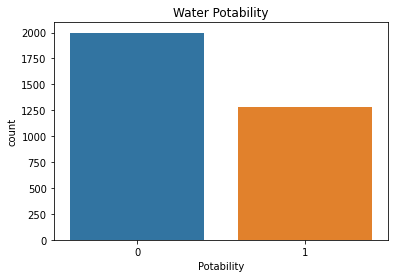

In [7]:
# Show count of the water potability
sns.color_palette("flare", as_cmap=True)
sns.set_palette("tab10")
bar = sns.countplot(x="Potability", data=dfNN)
bar.set_title("Water Potability")

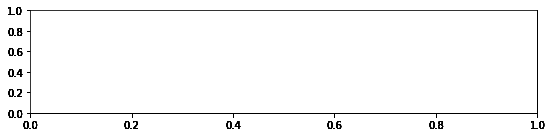

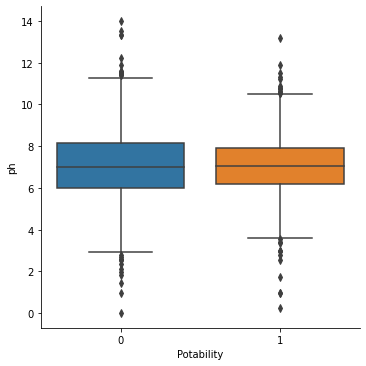

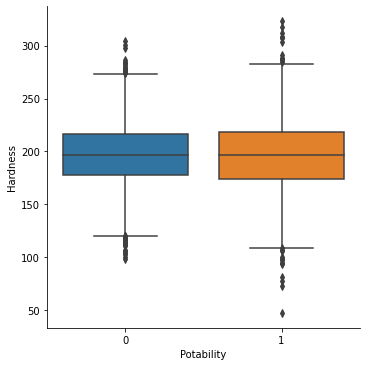

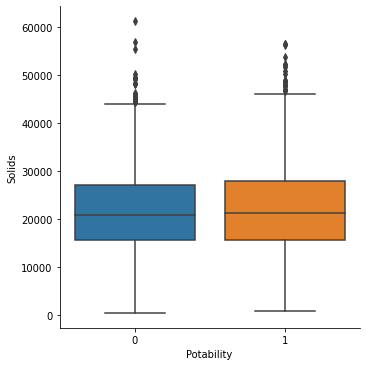

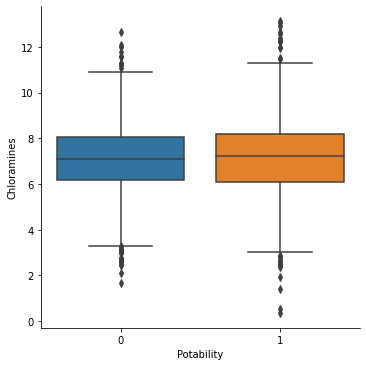

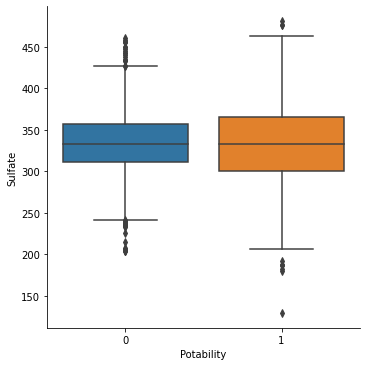

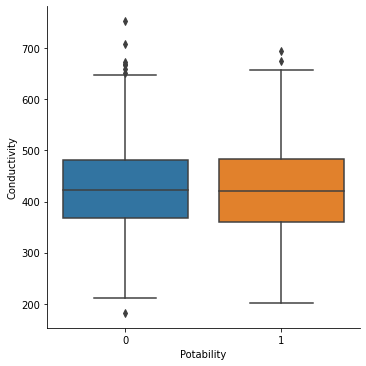

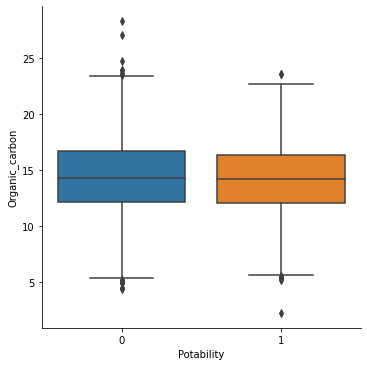

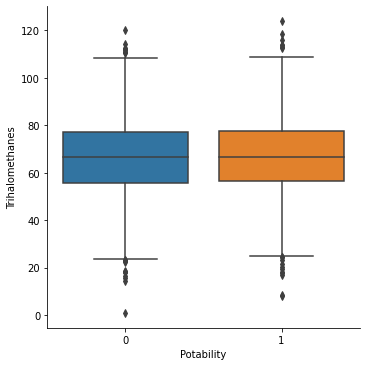

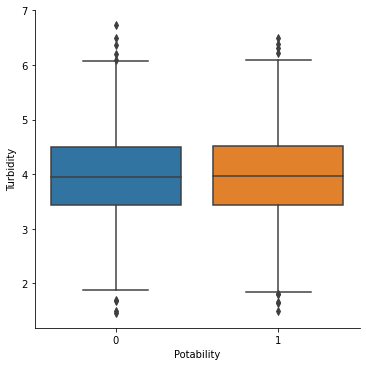

In [8]:
#Show catplot in relation to potability with various other parameters
fig = plt.figure(figsize = (20, 20))
cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate",
        "Conductivity", "Organic_carbon", "Trihalomethanes",
        "Turbidity"]
for name in cols:
    i = 0
    fig.add_subplot(int(len(cols)), 2, i+1)
    sns.catplot(x="Potability", y=name, data=dfNN, kind="box")

<AxesSubplot:>

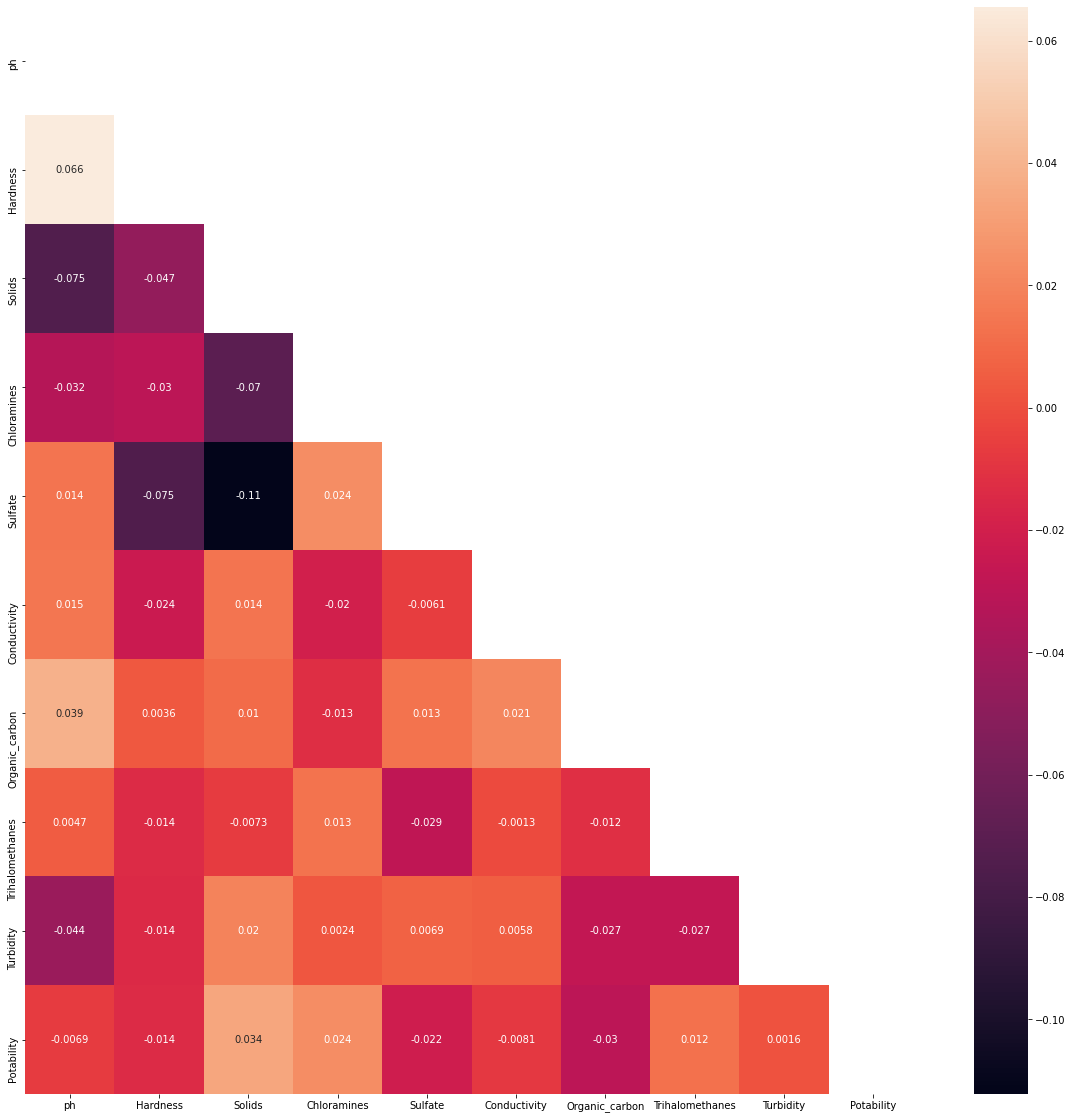

In [9]:
# Correlation plot of the parameters
plt.figure(figsize=(20, 20))
matrix = np.triu(dfNN.corr())
sns.heatmap(dfNN.corr(), annot=True, mask=matrix, cmap="rocket")

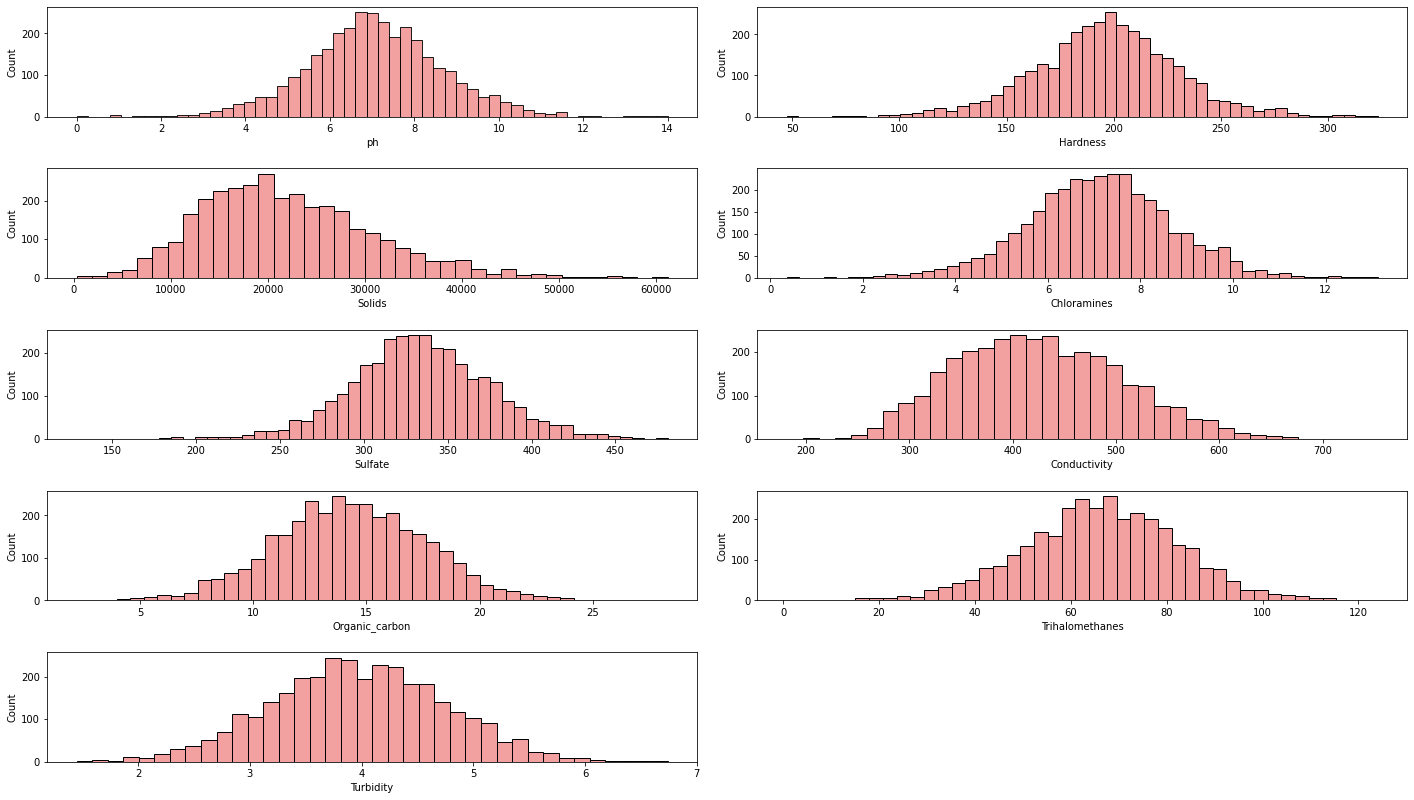

In [10]:
# distribution plot
plot_data = dfNN.drop(["Potability"], axis=1)
fig = plt.figure(figsize = (20, 20))
for i in range(0, len(plot_data.columns)):
    fig.add_subplot(int(len(plot_data.columns)), 2, int(i+1))
    #sns.distplot(plot_data.iloc[:, i], color="lightcoral", rug=True)
    sns.histplot(plot_data.iloc[:, i], color="lightcoral")
    fig.tight_layout(pad=2.0)

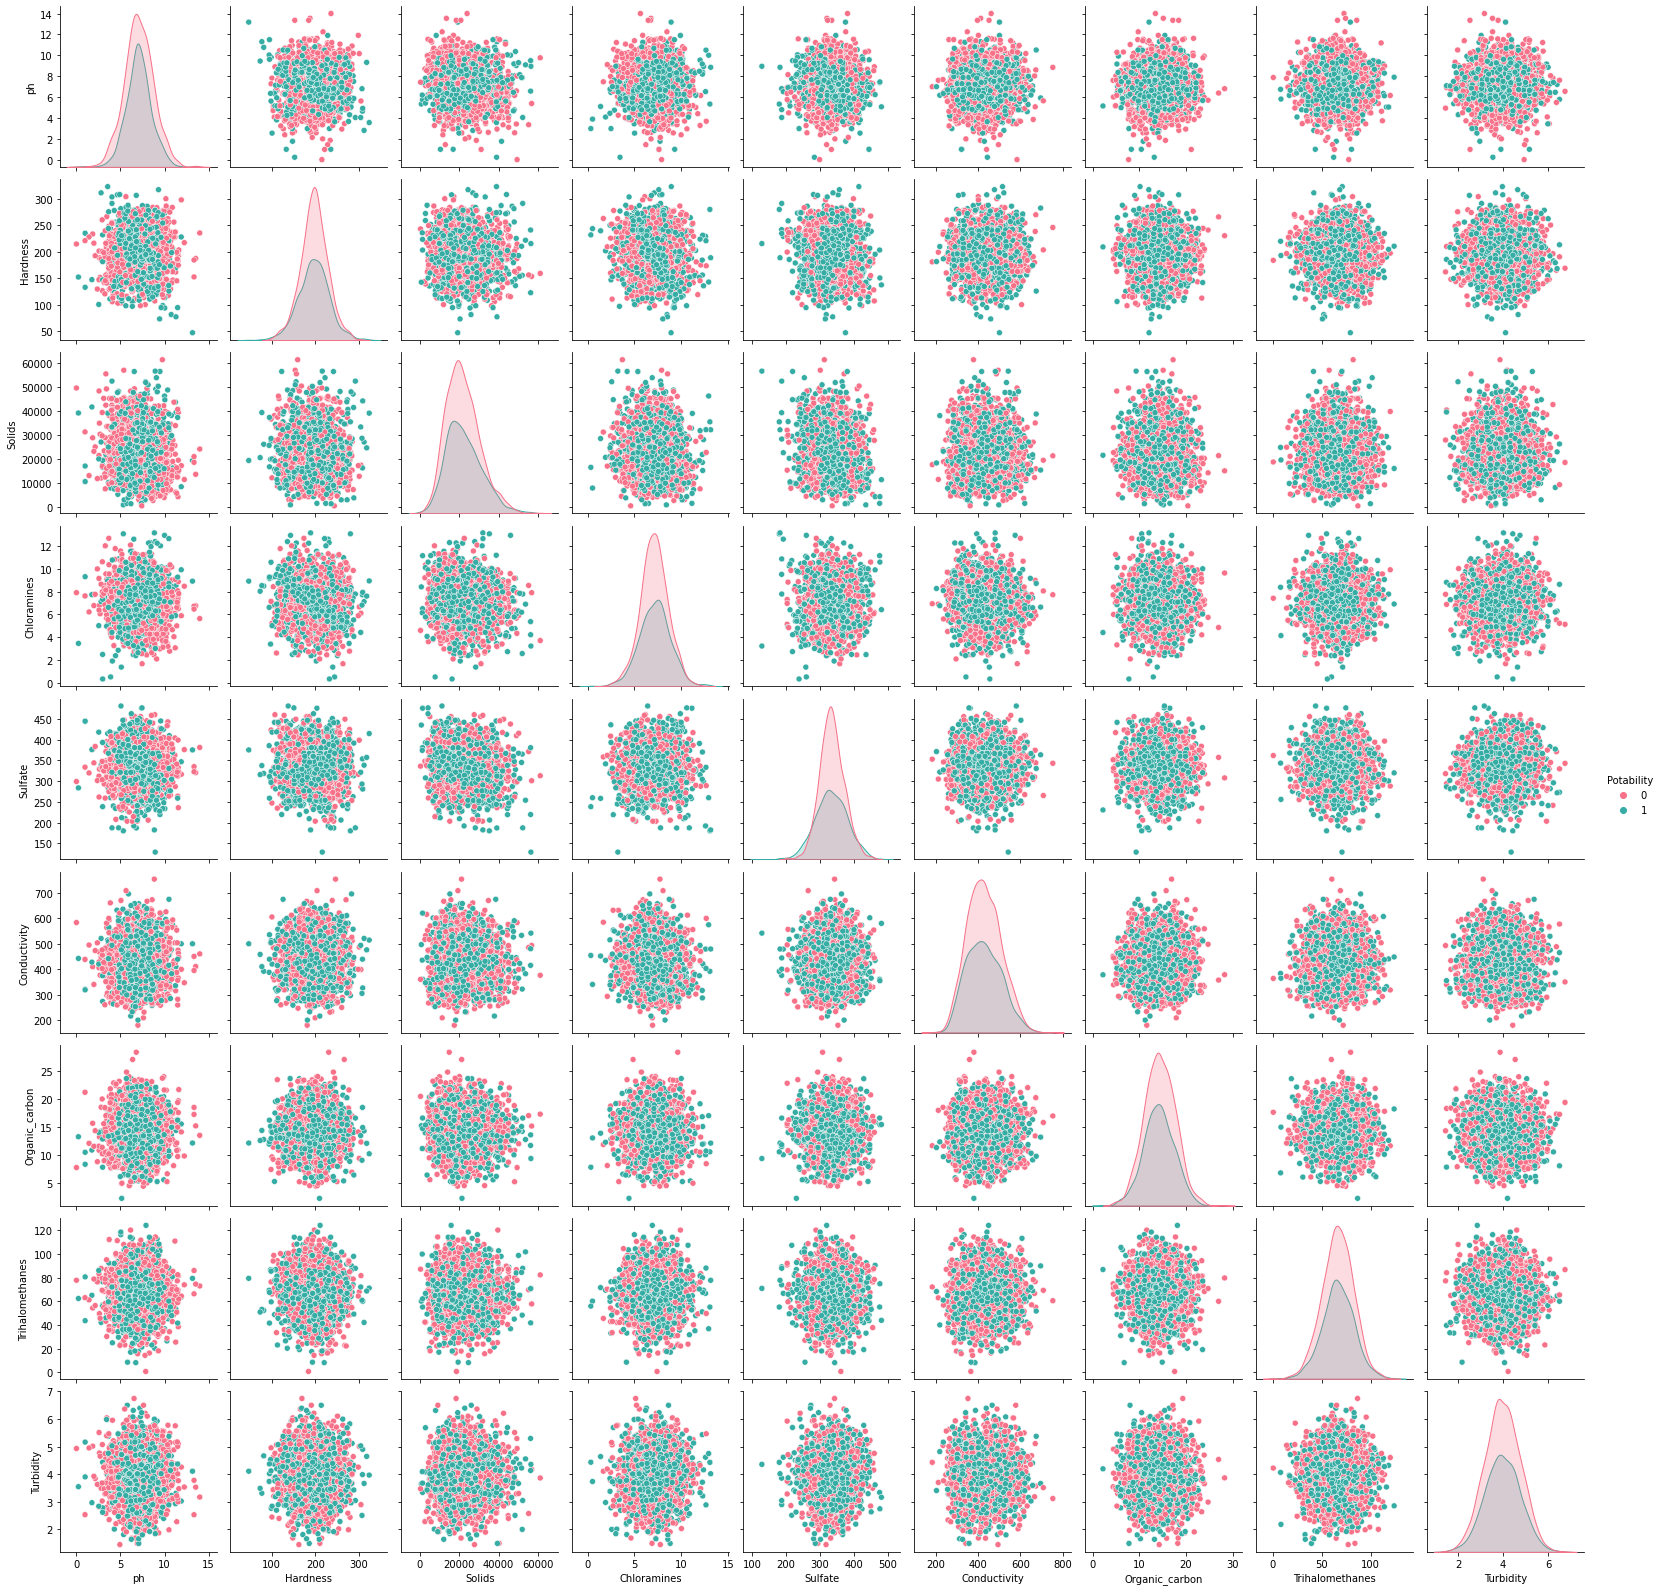

In [11]:
#pairplot
sns.pairplot(dfNN, hue="Potability", palette="husl")